# **AI Projects In Europe**

The goal of this project is to predict whether AI projects in Europe will succeed using NLP.

## **Libraries' Importation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import gensim
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from gensim.utils import simple_preprocess
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import pandas as pd
import re
import nltk #pour télécharger les ressources nécessaires de la bibliothèque NLTK, notamment les tokenizer (punkt) et les stopwords (stopwords).
nltk.download('punkt')
nltk.download('stopwords')
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import imblearn
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Data's First Impression**

In [ ]:
#Reading the data
data=pd.read_excel("Export-JRC-Data-Catalogue.xlsx")

In [ ]:
data.head()

,ID,Name,Website,Description,Intéret économique et public du projet (A>B>C),code annotateur,Geographical extent,Geographic coverage\nCountry,Geographic coverage \nNUTS 2021,Responsible\nOrganization,...,Improved management of public resources,Increased quality of processes and systems,Better collaboration and better communication,Reduced or eliminate the risk of corruption and abuse of the law by public servants,"Enabled greater fairness, honesty, equality",Open government capabilities,Increased transparency of public sector operations,Increased public participation in government actions and policy making,Improved public control and influence on government actions and policies,Source
0,1,AMS - public employment service,Algorithmic Profiling of Job Seekers in Austri...,"As of 2020, the Public Employment Service Aust...",NaN,1.0,National,Austria,AT,Public Employment Service Austria,...,NaN,NaN,NaN,NaN,NaN,Open government capabilities,NaN,NaN,x,(https://www.derstandard.at/story/200011948693...
1,2,Mona - Public chatbot for companies on the sub...,https://www.usp.gv.at/Portal.Node/usp/public,"The new chatbot ""Mona"" is intended to cover al...",NaN,2.0,National,Austria,AT,"Unternehmensservice Portal, Austria",...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,https://oecd-opsi.org/covid-response/infopoint...
2,3,CitizenLab - Youth for Climate,https://youth4climate.be/en/,Collecting input was just the easy part: in or...,NaN,3.0,National,Belgium,BE,"CitizenLab, Belgium",...,NaN,NaN,NaN,NaN,NaN,Open government capabilities,x,x,x,https://www.citizenlab.co/blog/product-update/...
3,4,Walloon - Agricultural subsidy monitoring with...,https://inspire.ec.europa.eu/sites/default/fil...,Walloon uses geo AI with satellite imagery to ...,NaN,4.0,Regional,Belgium,BE2,Département de l'Agriculture,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,ELISE INSPIRE webinar 3-6-2020 https://inspire...
4,5,AcPaas - Technical procurement documents compa...,https://acpaas.digipolis.be/nl/home,The city of Antwerp has a platform called Antw...,NaN,5.0,Local,Belgium,BE21,Digipolis & city of Antwerp,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,https://acpaas.digipolis.be/nl/product/NLP-eng...


In [ ]:
data.dtypes

ID                                                                                       int64
Name                                                                                    object
Website                                                                                 object
Description                                                                             object
Intéret économique et public du projet (A>B>C)                                         float64
code annotateur                                                                        float64
Geographical extent                                                                     object
Geographic coverage\nCountry                                                            object
Geographic coverage \nNUTS 2021                                                         object
Responsible\nOrganization                                                               object
Responsible \nOrganization \nCategory             

In [ ]:
#checking the precentages of missing data in each column
data.isnull().sum()

ID                                                                                       0
Name                                                                                     0
Website                                                                                 37
Description                                                                              0
Intéret économique et public du projet (A>B>C)                                         686
code annotateur                                                                         86
Geographical extent                                                                      0
Geographic coverage\nCountry                                                             0
Geographic coverage \nNUTS 2021                                                          0
Responsible\nOrganization                                                               23
Responsible \nOrganization \nCategory                                                    0

## **EDA**

**Status Target**

In [ ]:
data["Status"] = data["Status"].map({'Not in use anymore': 0, 'Planned' : 1,'In development':2,'Pilot':3,'Implemented':4})

**Description Feature**

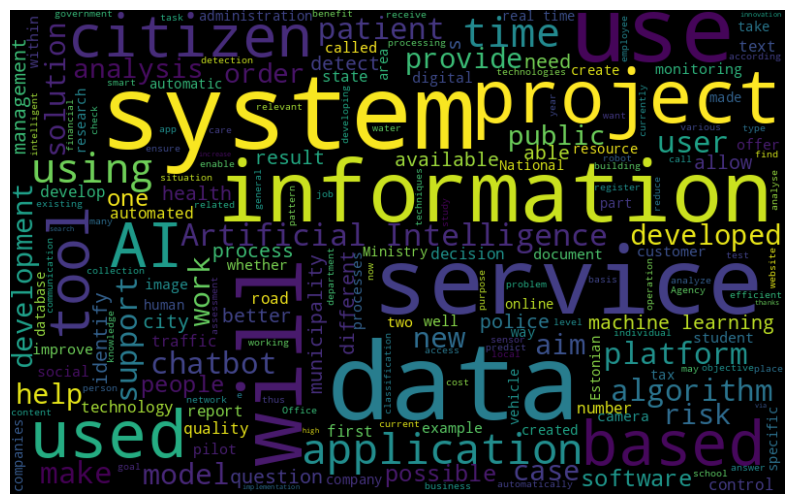

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Collecter tous les news.
all_words = ' '.join([text for text in data['Description']])

# Créer une visualisation des mots les plus fréquents
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Download required resources
nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming or Lemmatization
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Example usage
data['Description'] = data['Description'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Tokenize the text data
tokenized_data = [d.split() for d in data['Description']]

# Train Word2Vec model
model = Word2Vec(tokenized_data, vector_size=100, window=5, min_count=5, workers=4)

# Create word vectors for training data
vectors = []
for doc in tokenized_data:
    doc_vectors = []
    for word in doc:
        if word in model.wv:
            doc_vectors.append(model.wv[word])
    if doc_vectors:
        vectors.append(np.mean(doc_vectors, axis=0))
    else:
        vectors.append(np.zeros(100))  # Use zero vector if no words are present in the model vocabulary

In [ ]:
descriptions = data['Description']

# Create an empty array to store the description vectors
description_vectors = []

# Iterate over each description
for description in descriptions:
    words = description.split()  # Split the description into individual words
    word_vectors = [model.wv[word] for word in words if word in model.wv]  # Get the word vectors for words in the model's vocabulary
    if len(word_vectors) > 0:
        description_vector = np.mean(word_vectors, axis=0)  # Average the word vectors to get the description vector
    else:
        description_vector = np.zeros(model.vector_size)  # Use a zero vector if no word vectors found

    description_vectors.append(description_vector)

# Convert the list of description vectors to a numpy array
description_vectors = np.array(description_vectors)

In [ ]:
print(description_vectors[0])

[-1.95045128e-01  4.25036609e-01 -1.11651504e-02  1.94860604e-02
  9.81780440e-02 -3.96792918e-01  1.51408002e-01  4.87427443e-01
 -1.59315139e-01 -4.07273546e-02 -2.09946185e-01 -3.70459974e-01
  6.69791996e-02  8.04220885e-02  1.13860950e-01 -2.27347732e-01
  1.14678659e-01 -3.64295721e-01 -8.93348157e-02 -5.49829900e-01
  1.88649625e-01  2.22889543e-01  1.84762344e-01 -7.61809424e-02
 -7.85223022e-02 -9.46409404e-02 -3.29436153e-01 -2.28170007e-01
 -2.36492991e-01 -7.33886585e-02  3.72587234e-01  1.08706117e-01
 -1.72980479e-04 -1.26618505e-01 -1.42044991e-01  3.25105339e-01
 -1.03222854e-01 -3.49104226e-01 -2.09965646e-01 -4.28491086e-01
 -6.59131184e-02 -1.44969910e-01 -6.22568056e-02  6.34534061e-02
  1.82058409e-01 -2.44276579e-02 -1.90173075e-01 -5.44981547e-02
  5.03645279e-02  1.64210334e-01  1.12821095e-01 -3.32279623e-01
 -1.36390850e-01 -6.45862892e-02 -2.63171196e-01  5.84321544e-02
  1.19583420e-01 -1.08124495e-01 -3.58621657e-01  3.87636162e-02
  2.78063774e-01  1.04719

In [ ]:
#Dummy variables for the dataset variable

# concatenate dummy variables with original dataframe
description_vectors=description_vectors.tolist()
print(description_vectors[0])
data['description_vector'] = np.nan
for i in range(len(description_vectors)):
  data['description_vector'][i]=np.linalg.norm(description_vectors[i])
#numerical_dataset['description_vector'] = description_vectors.tolist()

# Now your dataset contains a new column 'description_vector' with the description vectors

# Save the updated dataset with the new column
data.to_excel('data_version_2.xlsx', index=False)  # Replace 'your_updated_dataset.csv' with the desired path and filename

[-0.1950451284646988, 0.42503660917282104, -0.011165150441229343, 0.019486060366034508, 0.09817804396152496, -0.3967929184436798, 0.15140800178050995, 0.4874274432659149, -0.15931513905525208, -0.04072735458612442, -0.2099461853504181, -0.37045997381210327, 0.06697919964790344, 0.08042208850383759, 0.11386094987392426, -0.227347731590271, 0.11467865854501724, -0.36429572105407715, -0.08933481574058533, -0.54982990026474, 0.18864962458610535, 0.22288954257965088, 0.18476234376430511, -0.07618094235658646, -0.07852230221033096, -0.09464094042778015, -0.32943615317344666, -0.2281700074672699, -0.23649299144744873, -0.07338865846395493, 0.3725872337818146, 0.10870611667633057, -0.000172980478964746, -0.12661850452423096, -0.14204499125480652, 0.32510533928871155, -0.10322285443544388, -0.34910422563552856, -0.20996564626693726, -0.42849108576774597, -0.0659131184220314, -0.1449699103832245, -0.06225680559873581, 0.06345340609550476, 0.1820584088563919, -0.024427657946944237, -0.19017307460

<ipython-input-191-168c6000737d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['description_vector'][i]=np.linalg.norm(description_vectors[i])


**Geographical Extent**

<Axes: xlabel='Geographical extent', ylabel='count'>

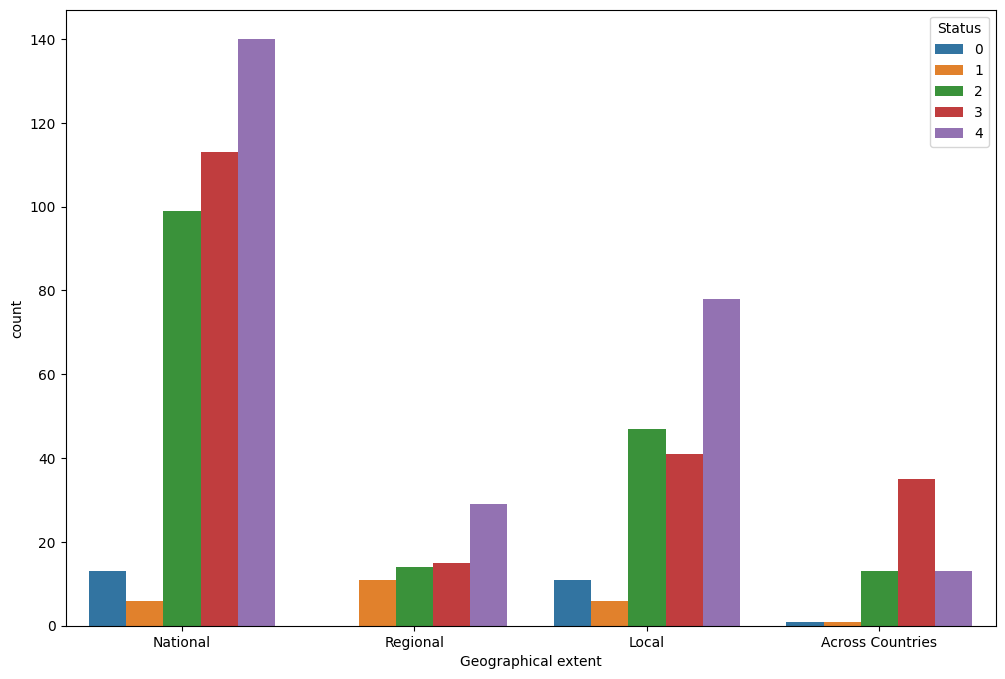

In [ ]:
#Data Visualization
fig, ax = plt.subplots(figsize=(12,8 ))
sns.countplot(data=data, x="Geographical extent", hue="Status")

In [ ]:
#Dummy variables for the dataset variable
dummy_df = pd.get_dummies(data['Geographical extent'])
# concatenate dummy variables with original dataframe
data = pd.concat([data, dummy_df], axis=1)

In [ ]:
#Dropping the column dataset
data = data.drop('Geographical extent', axis=1)

**Responsible Organization Category**

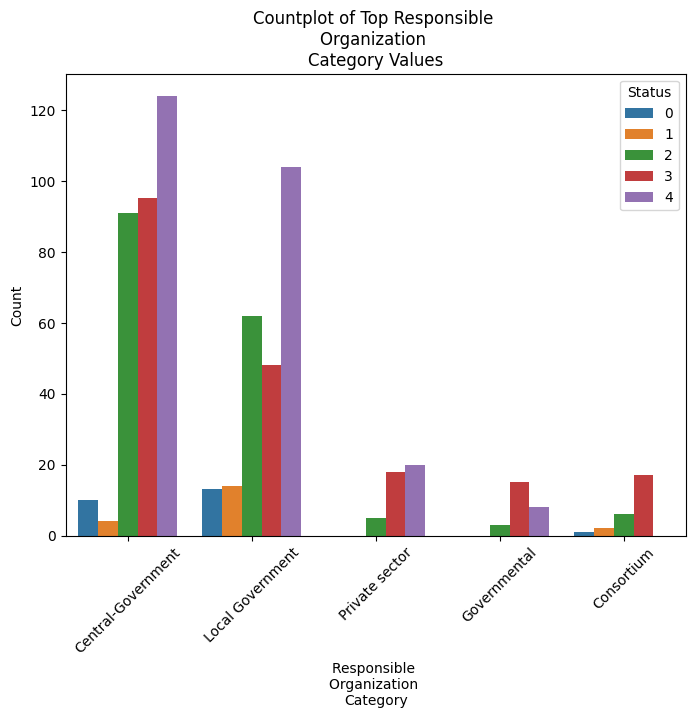

In [ ]:
#Data Visualization
value_counts = data['Responsible \nOrganization \nCategory'].value_counts()

# Select the top max values
max_values = 5
top_values = value_counts[:max_values]

# Plot the countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Responsible \nOrganization \nCategory',hue="Status", order=top_values.index)
plt.title('Countplot of Top Responsible \nOrganization \nCategory Values'.format(max))
plt.xlabel('Responsible \nOrganization \nCategory')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Dummy variables for the dataset variable
dummy_df = pd.get_dummies(data['Responsible \nOrganization \nCategory'])
# concatenate dummy variables with original dataframe
data = pd.concat([data, dummy_df], axis=1)

In [ ]:
#Dropping the column dataset
data = data.drop('Responsible \nOrganization \nCategory', axis=1)

**Functions Of Government**

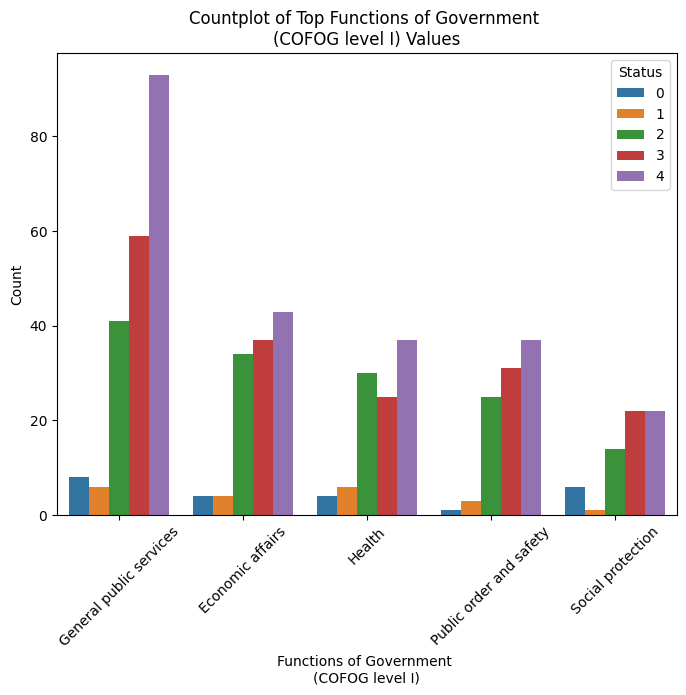

In [ ]:
#Data Visualization
value_counts = data['Functions of Government \n(COFOG level I)'].value_counts()

# Select the top max values
max_values = 5
top_values = value_counts[:max_values]

# Plot the countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Functions of Government \n(COFOG level I)',hue="Status", order=top_values.index)
plt.title('Countplot of Top Functions of Government \n(COFOG level I) Values'.format(max))
plt.xlabel('Functions of Government \n(COFOG level I)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Dummy variables for the dataset variable
dummy_df = pd.get_dummies(data['Functions of Government \n(COFOG level I)'])
# concatenate dummy variables with original dataframe
data = pd.concat([data, dummy_df], axis=1)

In [ ]:
#Dropping the column dataset
data = data.drop('Functions of Government \n(COFOG level I)', axis=1)

**Process Type**

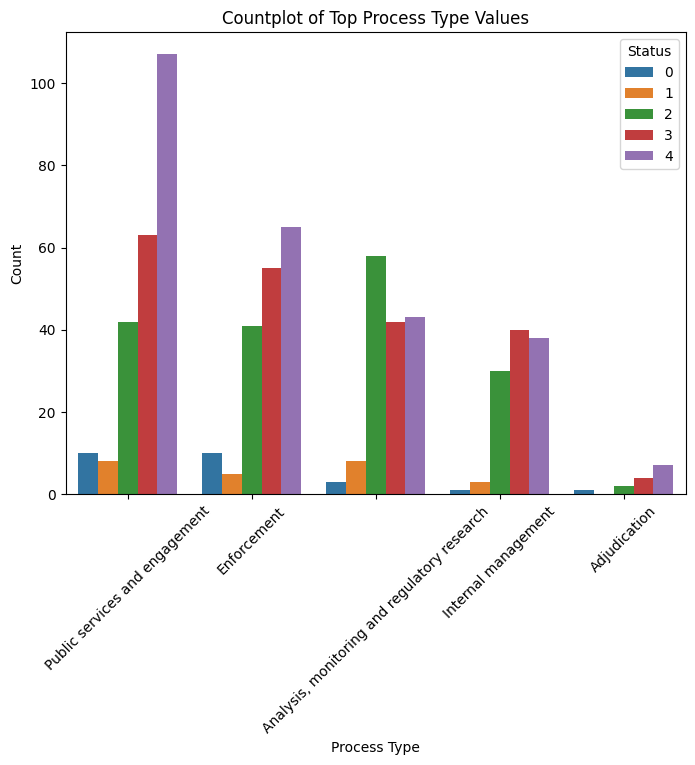

In [ ]:
#Data Visualization
value_counts = data['Process Type'].value_counts()

# Select the top max values
max_values = 5
top_values = value_counts[:max_values]

# Plot the countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Process Type',hue="Status", order=top_values.index)
plt.title('Countplot of Top Process Type Values'.format(max))
plt.xlabel('Process Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Dummy variables for the dataset variable
dummy_df = pd.get_dummies(data['Process Type'])
# concatenate dummy variables with original dataframe
data = pd.concat([data, dummy_df], axis=1)

In [ ]:
#Dropping the column dataset
data = data.drop('Process Type', axis=1)

**Interaction**

<Axes: xlabel='Interaction', ylabel='count'>

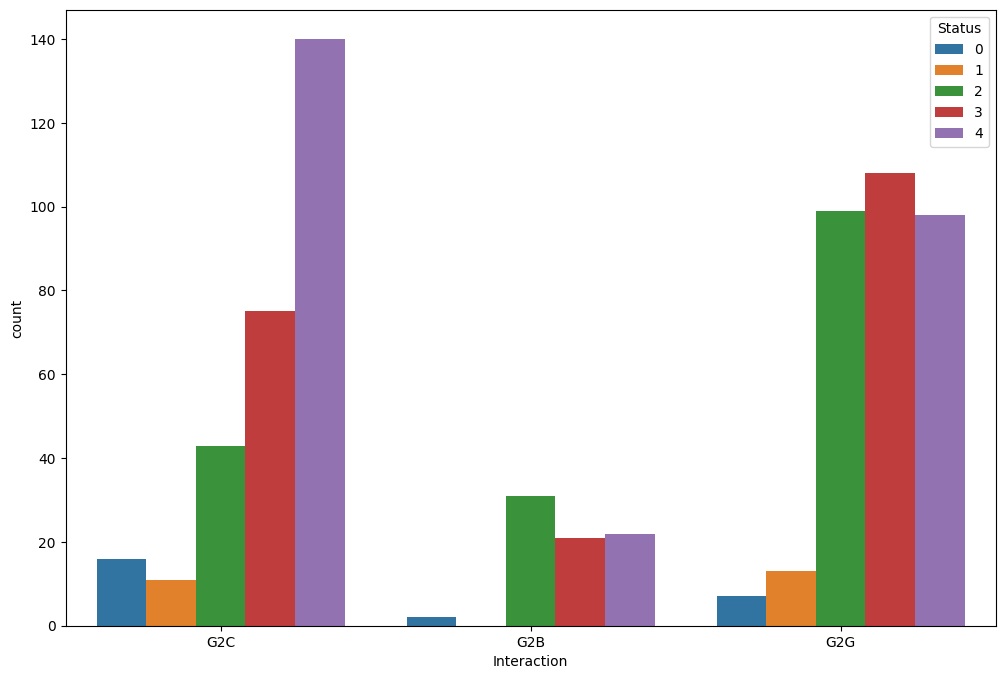

In [ ]:
#Data Visualization
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=data, x="Interaction", hue="Status")

In [ ]:
#Dummy variables for the dataset variable
dummy_df = pd.get_dummies(data['Interaction'])
# concatenate dummy variables with original dataframe
data = pd.concat([data, dummy_df], axis=1)

In [ ]:
#Dropping the column dataset
data = data.drop('Interaction', axis=1)

**Application Type**

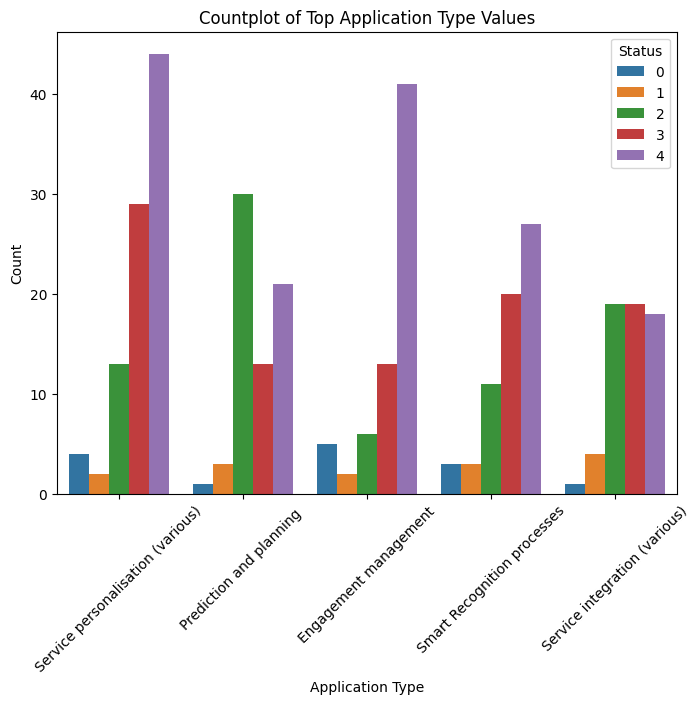

In [ ]:
#Data Visualization
value_counts = data['Application Type'].value_counts()

# Select the top max values
max_values = 5
top_values = value_counts[:max_values]

# Plot the countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Application Type',hue="Status", order=top_values.index)
plt.title('Countplot of Top Application Type Values'.format(max))
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Dummy variables for the dataset variable
dummy_df = pd.get_dummies(data['Application Type'])
# concatenate dummy variables with original dataframe
data = pd.concat([data, dummy_df], axis=1)

In [ ]:
#Dropping the column dataset
data = data.drop('Application Type', axis=1)

**Improved Public Service**

<Axes: xlabel='Improved Public Service', ylabel='count'>

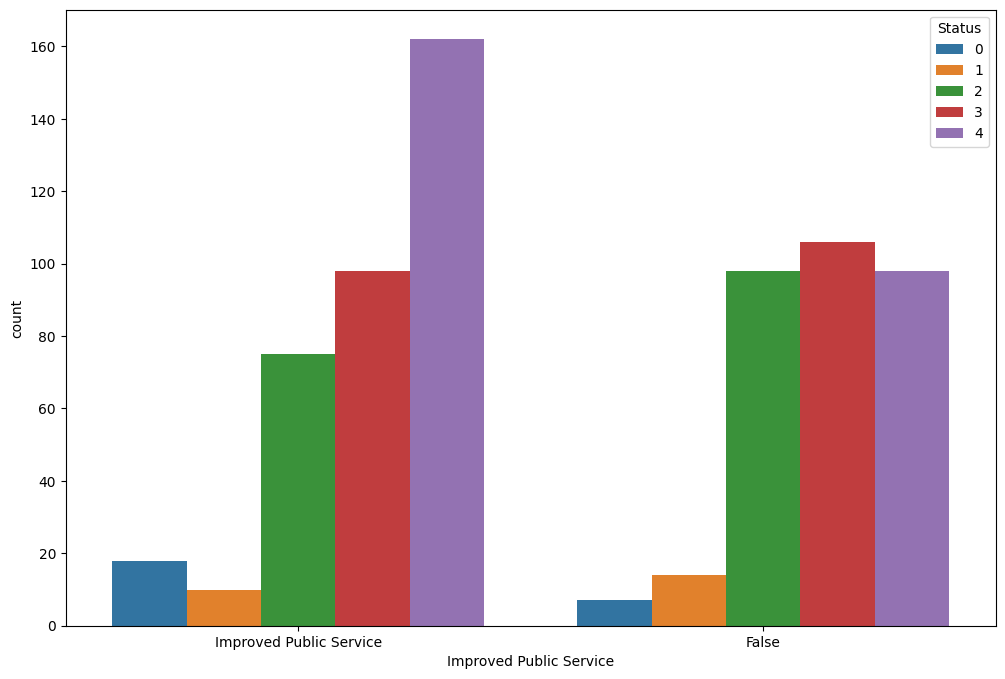

In [ ]:
fig, ax = plt.subplots(figsize=(12,8 ))
sns.countplot(data=data, x="Improved Public Service", hue="Status")

In [ ]:
data["Improved Public Service"] = data["Improved Public Service"].map({'False': 0,'Improved Public Service' : 1})

In [ ]:
data['Improved Public Service'].fillna(0, inplace=True)

**Improved Administrative Efficiency**

<Axes: xlabel='Improved Administrative Efficiency', ylabel='count'>

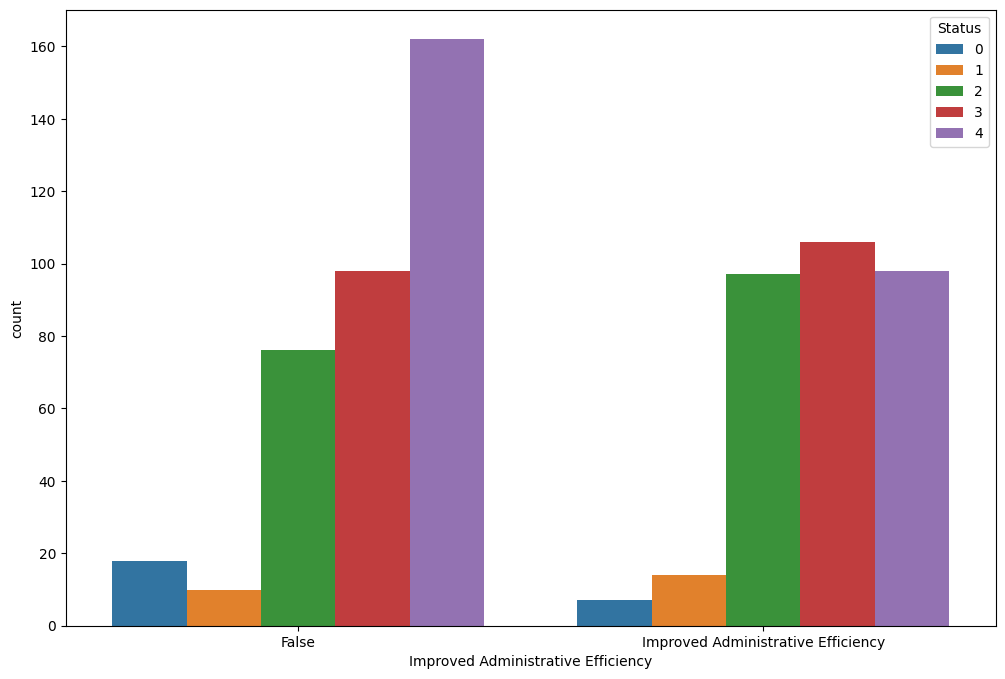

In [ ]:
#Data Visualization
fig, ax = plt.subplots(figsize=(12,8 ))
sns.countplot(data=data, x="Improved Administrative Efficiency", hue="Status")

In [ ]:
data["Improved Administrative Efficiency"] = data["Improved Administrative Efficiency"].map({'False': 0,'Improved Administrative Efficiency' : 1,})

In [ ]:
data['Improved Administrative Efficiency'].fillna(0, inplace=True)

## **Class Imbalance**

<Axes: ylabel='Status'>

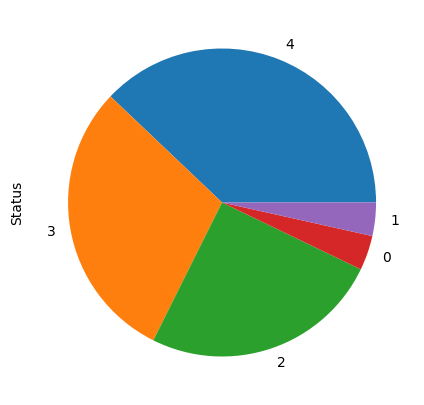

In [ ]:
num=data['Status'].value_counts()
num.plot(kind='pie',figsize=(10, 5))

In [ ]:
# Filter columns based on data types
numerical_columns = data.select_dtypes(include='number').columns

# Select only numerical columns
numerical_dataset = data[numerical_columns]

In [ ]:
numerical_dataset.isnull().sum()

ID                                                  0
Intéret économique et public du projet (A>B>C)    686
code annotateur                                    86
Status                                              0
Start Year                                          0
End Year                                          568
Improved Public Service                             0
Improved Administrative Efficiency                  0
description_vector                                  0
Across Countries                                    0
Local                                               0
National                                            0
Regional                                            0
Academic-Research                                   0
Central-Government                                  0
Community led                                       0
Consortium                                          0
Governmental                                        0
Local Government            

In [ ]:
#numerical_dataset=numerical_dataset.drop('Improved Public Service', axis=1)

In [ ]:
#numerical_dataset=numerical_dataset.drop('Improved Administrative Efficiency', axis=1)

In [ ]:
numerical_dataset=numerical_dataset.drop('Intéret économique et public du projet (A>B>C)', axis=1)

In [ ]:
numerical_dataset=numerical_dataset.drop('code annotateur', axis=1)

In [ ]:
numerical_dataset=numerical_dataset.drop('End Year', axis=1)

In [ ]:
numerical_dataset=numerical_dataset.drop('ID', axis=1)

In [ ]:
#numerical_dataset=numerical_dataset.drop('description_vector', axis=1)

In [ ]:
numerical_dataset.head

<bound method NDFrame.head of       ID  Status  Start Year  Improved Public Service  \
0      1       0        2020                      1.0   
1      2       4        2020                      1.0   
2      3       4        2019                      1.0   
3      4       4        2020                      1.0   
4      5       4        2020                      1.0   
..   ...     ...         ...                      ...   
681  682       4        2021                      1.0   
682  683       1        2021                      0.0   
683  684       4        2021                      1.0   
684  685       1        2021                      0.0   
685  686       3        2021                      0.0   

     Improved Administrative Efficiency  description_vector  Across Countries  \
0                                   0.0            2.231299                 0   
1                                   0.0            2.304309                 0   
2                                   0.0   

3.6443148688046647
Class=0, n=25 (3.644%)
37.90087463556851
Class=4, n=260 (37.901%)
25.218658892128282
Class=2, n=173 (25.219%)
29.737609329446062
Class=3, n=204 (29.738%)
3.498542274052478
Class=1, n=24 (3.499%)


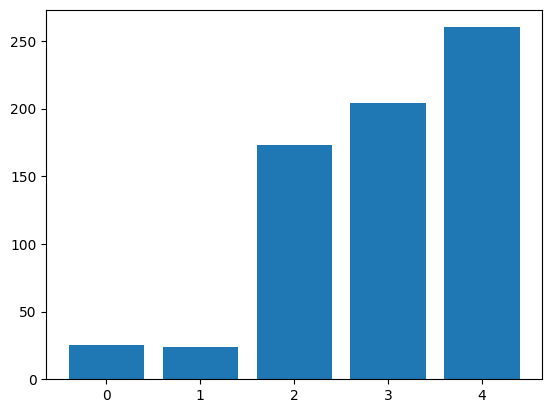

In [ ]:
# split into input and output elements
X = numerical_dataset.drop(columns=['Status'])  # features
y = numerical_dataset["Status"]   # target
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print(per)
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=260 (20.000%)
Class=4, n=260 (20.000%)
Class=2, n=260 (20.000%)
Class=3, n=260 (20.000%)
Class=1, n=260 (20.000%)


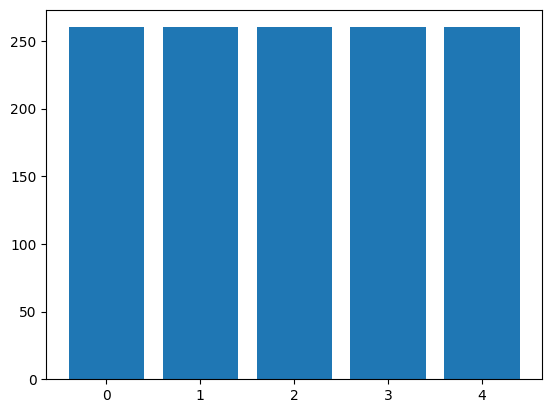

In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

<Axes: ylabel='Status'>

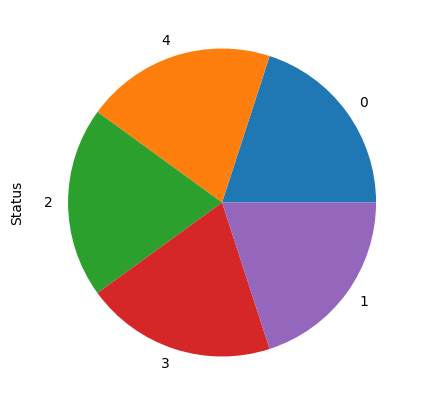

In [ ]:
num=y.value_counts()
num.plot(kind='pie',figsize=(10, 5))

## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82        55
           1       0.92      0.96      0.94        47
           2       0.57      0.52      0.55        52
           3       0.58      0.38      0.46        56
           4       0.53      0.72      0.61        50

    accuracy                           0.68       260
   macro avg       0.68      0.69      0.67       260
weighted avg       0.67      0.68      0.67       260



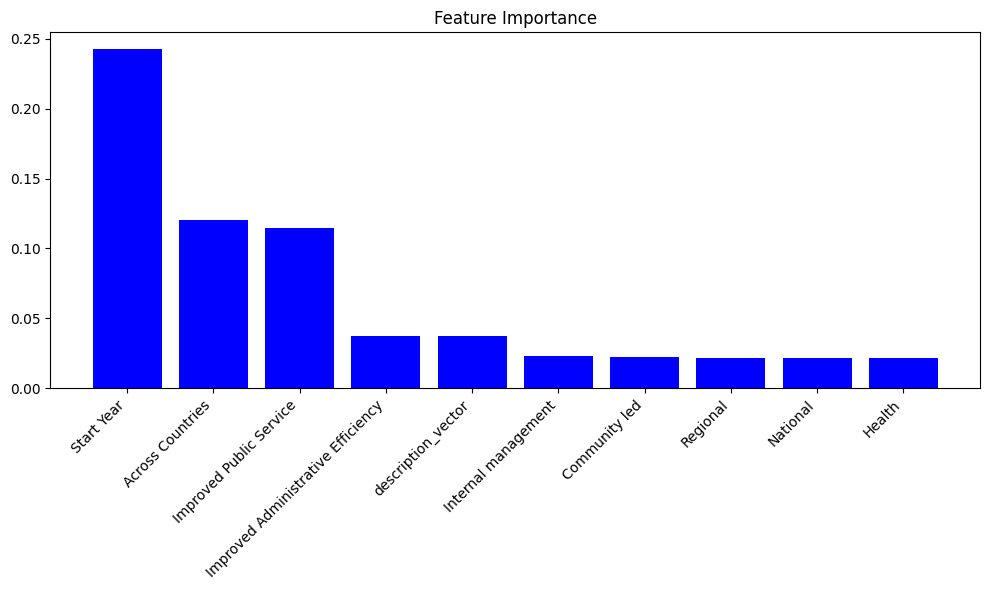

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Limit the number of features to show
max_features = 10

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(max_features), importances[indices[:max_features]], color="b", align="center")
plt.xticks(range(max_features), feature_names[indices[:max_features]], rotation=45, ha="right")
plt.tight_layout()
plt.show()


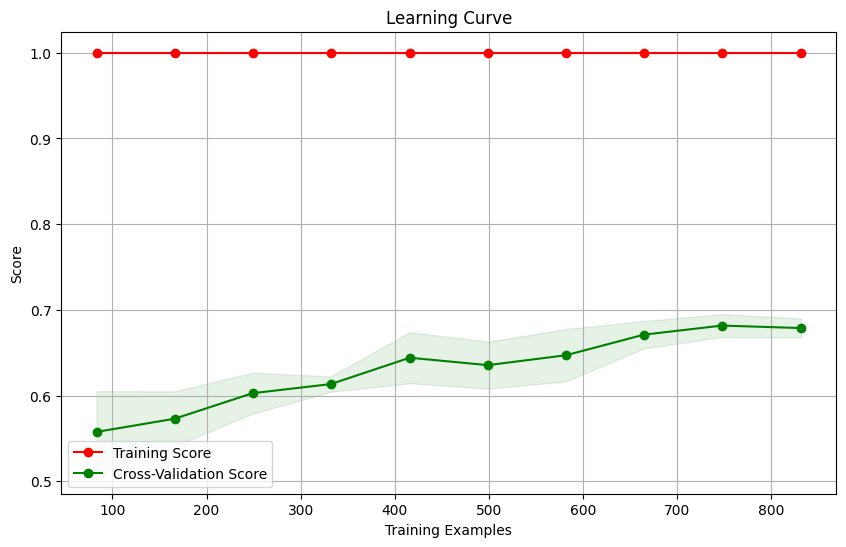

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

# Create a Random Forest classifier
model = RandomForestClassifier()

# Define the number of training samples to use for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)  # 10 evenly spaced training sizes from 10% to 100% of the dataset

# Calculate the learning curve scores
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=train_sizes, cv=5)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()


## **SVM**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [ ]:
from sklearn.svm import SVC
# Create an SVM classifier
svm_classifier = SVC()

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's accuracy

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        81
           1       0.93      0.90      0.92        84
           2       0.43      0.44      0.43        75
           3       0.44      0.32      0.37        69
           4       0.48      0.56      0.51        81

    accuracy                           0.63       390
   macro avg       0.62      0.62      0.61       390
weighted avg       0.63      0.63      0.63       390



## **Logistic Regresstion**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83        81
           1       0.86      0.92      0.89        84
           2       0.33      0.33      0.33        75
           3       0.42      0.30      0.35        69
           4       0.47      0.52      0.49        81

    accuracy                           0.60       390
   macro avg       0.58      0.58      0.58       390
weighted avg       0.59      0.60      0.59       390



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **LIME Model**

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=836c7b18b7bd5d427fc276774330d0a6cc954f6928150c6fd7e60d472851c68f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
# ... (code to load your dataset)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a machine learning model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)
feature_names = ['ID','Intéret économique et public du projet (A>B>C)', 'code annotateur','Start Year','Across Countries','Local','National','Regional','Academic-Research','Central-Government','Community led','Consortium','Governmental','Local Government','Non-governmental','Private sector','Defence','Economic affairs','Education',
'Environmental protection',
'General public services',
'Health',
'Housing and community amenities',
'Public order and safety',
'Recreation, culture and religion',
'Social protection',
'Adjudication',
'Analysis, monitoring and regulatory research',
'Enforcement',
'Internal management',
'Public services and engagement',
'G2B',
'G2C',
'G2G']
class_names = ['Status']
# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns.tolist(),
                                                   class_names=y_train.unique(),
                                                   discretize_continuous=True)

# Select a sample instance from the testing set to explain
sample_idx = 0  # Replace with the desired index of the sample to explain
sample = X_test.iloc[sample_idx]
true_label = y_test.iloc[sample_idx]

# Generate an explanation for the sample
explanation = explainer.explain_instance(sample.values, model.predict_proba, num_features=5)

# Print the explanation
print('Explanation for the sample:')
print(explanation.as_list())

# Plot the explanation
explanation.show_in_notebook()
'''
# Create the explainer
#explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=class_names)

# Select an instance for explanation from the testing set
instance = X_test[0]

# Explain the instance using LIME
explanation = explainer.explain_instance(instance, model.predict_proba, num_features=len(feature_names))

# Print the explanation
explanation.show_in_notebook()  # Display the explanation in a Jupyter
'''

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Explanation for the sample:
[('Regional <= 0.00', -0.09509410863659977), ('0.00 < National <= 1.00', -0.05621973438869588), ('0.00 < Central-Government <= 1.00', -0.054479142792430296), ('0.43 < Improved Administrative Efficiency <= 1.00', 0.048994280901533224), ('Public services and engagement <= 0.00', 0.046405854330939675)]


'\n# Create the explainer\n#explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=class_names)\n\n# Select an instance for explanation from the testing set\ninstance = X_test[0]\n                                               \n# Explain the instance using LIME\nexplanation = explainer.explain_instance(instance, model.predict_proba, num_features=len(feature_names))\n\n# Print the explanation\nexplanation.show_in_notebook()  # Display the explanation in a Jupyter \n'

In [ ]:
# Generate an explanation for the sample
explanation = explainer.explain_instance(sample.values, model.predict_proba, num_features=5)

# Get the feature names and values
features = explanation.as_list()
feature_names = [feature[0] for feature in features]
feature_weights = [feature[1] for feature in features]

# Calculate feature importances
total_weight = sum(abs(weight) for weight in feature_weights)
feature_importances = [(name, abs(weight) / total_weight) for name, weight in zip(feature_names, feature_weights)]

# Sort the features based on their importances
sorted_features = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print the most important features
print('Most important features:')
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Most important features:
Regional <= 0.00: 0.3016933838046718
0.00 < Central-Government <= 1.00: 0.18500665274382633
0.00 < National <= 1.00: 0.1840398848779417
Public services and engagement <= 0.00: 0.17822448790577608
0.43 < Improved Administrative Efficiency <= 1.00: 0.1510355906677842
